In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Bayesian Ridge Regressor from sklearn
from sklearn.linear_model import BayesianRidge
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Display plots inline
%matplotlib inline


In [2]:
# Load the diabetes dataset
diabetes = load_diabetes()

# Convert it into a DataFrame
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

# Add the target variable to the DataFrame
df['target'] = diabetes.target

# Display the first few rows
df.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [3]:
# Define X (features) and y (target)
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the training and testing sets
X_train.shape, X_test.shape


((353, 10), (89, 10))

In [4]:
# Initialize Bayesian Ridge Regressor with default parameters
br_model = BayesianRidge()

# Train the model on the training data
br_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = br_model.predict(X_test)


In [5]:
# Calculate MSE and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation results
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r2}')


Mean Squared Error (MSE): 2871.7621095546
R-squared (R²): 0.4579690718827282


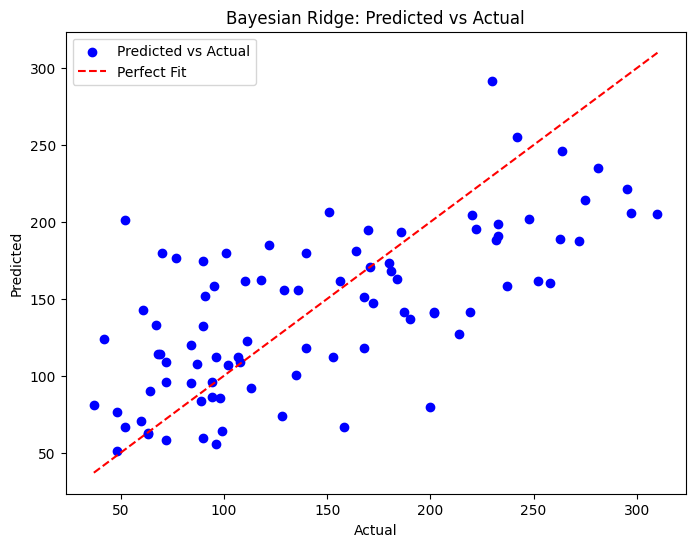

In [6]:
# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Fit')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Bayesian Ridge: Predicted vs Actual')
plt.legend()
plt.show()


In [8]:
# Initialize lists to store results
alpha_1_values = [1e-6, 1e-5, 1e-4]
alpha_2_values = [1e-6, 1e-5, 1e-4]
lambda_1_values = [1e-6, 1e-5, 1e-4]
lambda_2_values = [1e-6, 1e-5, 1e-4]

mse_alpha_1_results = []
mse_alpha_2_results = []
mse_lambda_1_results = []
mse_lambda_2_results = []

# Loop through different alpha_1 values
for alpha_1 in alpha_1_values:
    br_model = BayesianRidge(alpha_1=alpha_1)
    br_model.fit(X_train, y_train)
    y_pred = br_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_alpha_1_results.append(mse)

# Loop through different alpha_2 values
for alpha_2 in alpha_2_values:
    br_model = BayesianRidge(alpha_2=alpha_2)
    br_model.fit(X_train, y_train)
    y_pred = br_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_alpha_2_results.append(mse)

# Loop through different lambda_1 values
for lambda_1 in lambda_1_values:
    br_model = BayesianRidge(lambda_1=lambda_1)
    br_model.fit(X_train, y_train)
    y_pred = br_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_lambda_1_results.append(mse)

# Loop through different lambda_2 values
for lambda_2 in lambda_2_values:
    br_model = BayesianRidge(lambda_2=lambda_2)
    br_model.fit(X_train, y_train)
    y_pred = br_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_lambda_2_results.append(mse)

# Print the results for alpha_1
print("alpha_1 Results:")
for i, alpha_1 in enumerate(alpha_1_values):
    print(f"alpha_1={alpha_1}: MSE = {mse_alpha_1_results[i]}")

# Print the results for alpha_2
print("\nalpha_2 Results:")
for i, alpha_2 in enumerate(alpha_2_values):
    print(f"alpha_2={alpha_2}: MSE = {mse_alpha_2_results[i]}")

# Print the results for lambda_1
print("\nlambda_1 Results:")
for i, lambda_1 in enumerate(lambda_1_values):
    print(f"lambda_1={lambda_1}: MSE = {mse_lambda_1_results[i]}")

# Print the results for lambda_2
print("\nlambda_2 Results:")
for i, lambda_2 in enumerate(lambda_2_values):
    print(f"lambda_2={lambda_2}: MSE = {mse_lambda_2_results[i]}")


alpha_1 Results:
alpha_1=1e-06: MSE = 2871.7621095546
alpha_1=1e-05: MSE = 2871.762110215955
alpha_1=0.0001: MSE = 2871.762116829501

alpha_2 Results:
alpha_2=1e-06: MSE = 2871.7621095546
alpha_2=1e-05: MSE = 2871.762109554377
alpha_2=0.0001: MSE = 2871.7621095521445

lambda_1 Results:
lambda_1=1e-06: MSE = 2871.7621095546
lambda_1=1e-05: MSE = 2871.762082560614
lambda_1=0.0001: MSE = 2871.7618126222183

lambda_2 Results:
lambda_2=1e-06: MSE = 2871.7621095546
lambda_2=1e-05: MSE = 2871.762109554914
lambda_2=0.0001: MSE = 2871.7621095580466


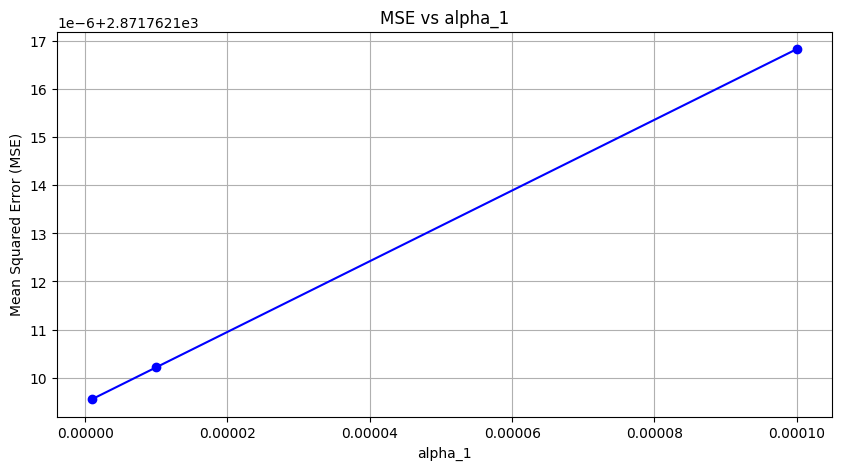

In [9]:
# Plot MSE for different alpha_1 values
plt.figure(figsize=(10, 5))
plt.plot(alpha_1_values, mse_alpha_1_results, marker='o', color='blue', label='MSE')
plt.title('MSE vs alpha_1')
plt.xlabel('alpha_1')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.show()


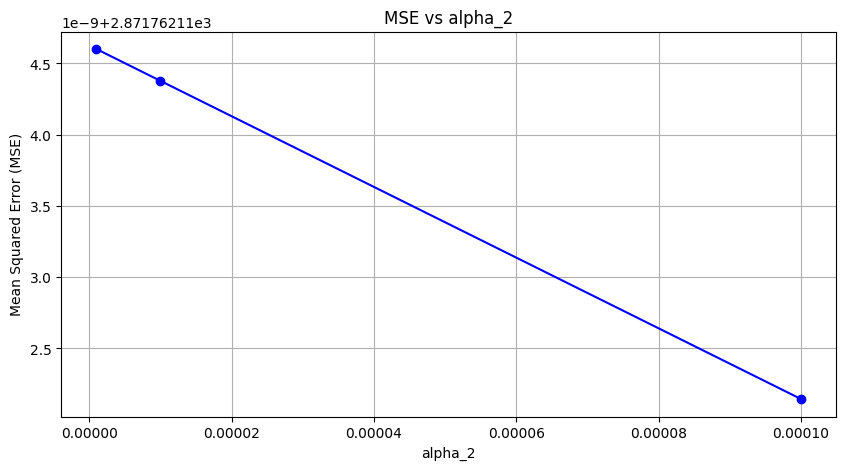

In [10]:
# Plot MSE for different alpha_2 values
plt.figure(figsize=(10, 5))
plt.plot(alpha_2_values, mse_alpha_2_results, marker='o', color='blue', label='MSE')
plt.title('MSE vs alpha_2')
plt.xlabel('alpha_2')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.show()


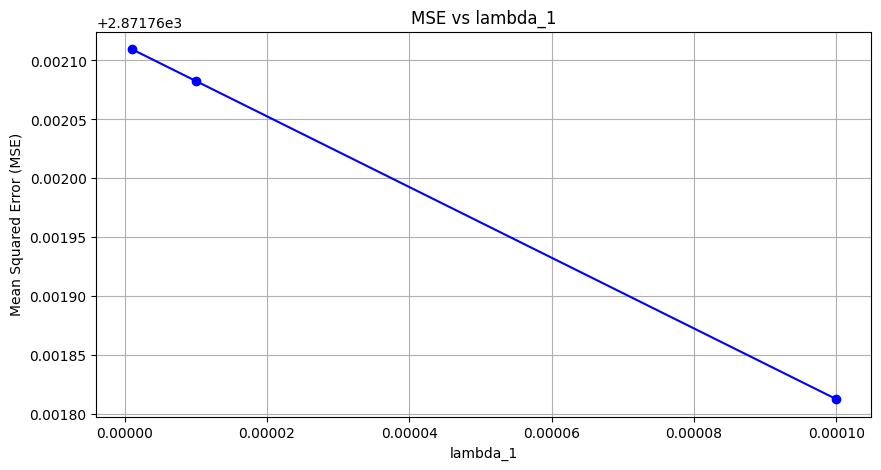

In [11]:
# Plot MSE for different lambda_1 values
plt.figure(figsize=(10, 5))
plt.plot(lambda_1_values, mse_lambda_1_results, marker='o', color='blue', label='MSE')
plt.title('MSE vs lambda_1')
plt.xlabel('lambda_1')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.show()


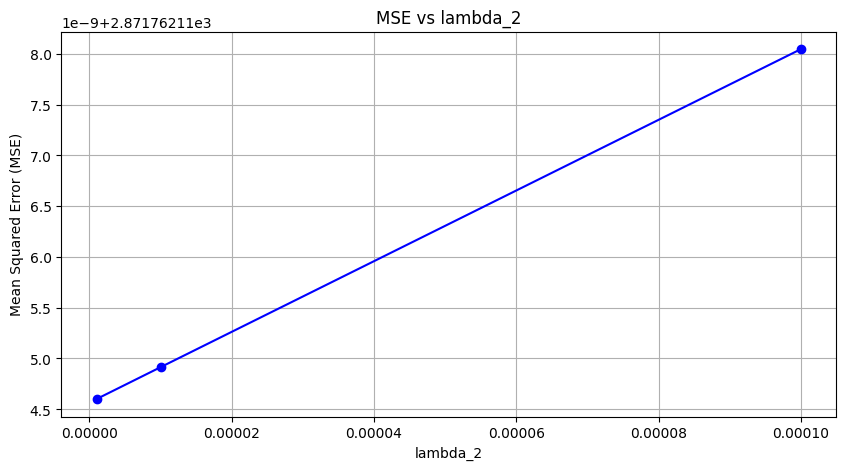

In [12]:
# Plot MSE for different lambda_2 values
plt.figure(figsize=(10, 5))
plt.plot(lambda_2_values, mse_lambda_2_results, marker='o', color='blue', label='MSE')
plt.title('MSE vs lambda_2')
plt.xlabel('lambda_2')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.show()
